In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat


# 1.READ THE  DATASET TO THE PYTHON ENVIRONMENT

In [2]:
df=pd.read_excel('iris.xls')

In [3]:
df.head()

SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
2  NaN  3.2  1.3  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa

# 2.DO NECESSARY PREPROCESSING STEPS.

In [4]:
df.head()

SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
2  NaN  3.2  1.3  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
#filling missing values

In [10]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

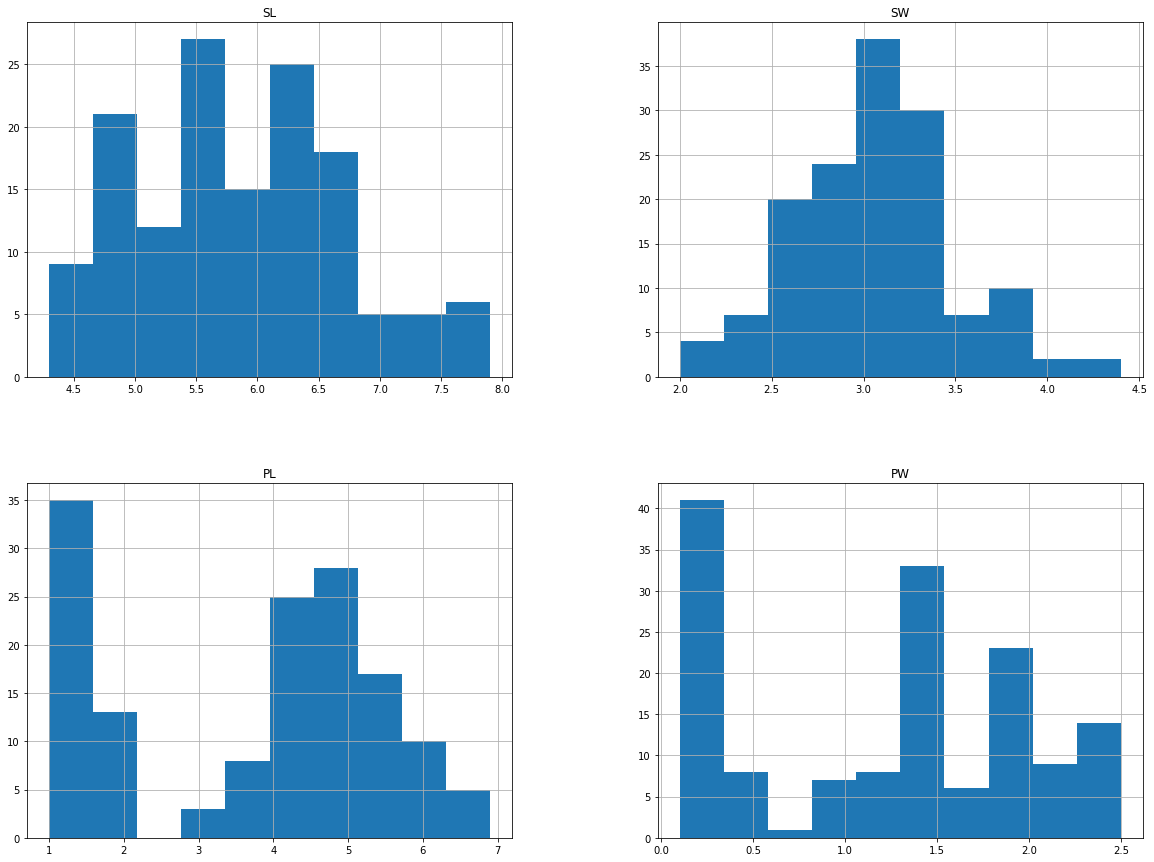

In [11]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [13]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [16]:
for i in ['SL','SW','PL','PW']:
    df[i]=df[i].fillna(df[i].mean())

In [17]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

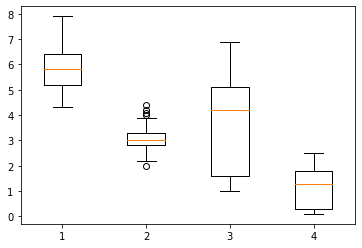

In [18]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])
plt.show()

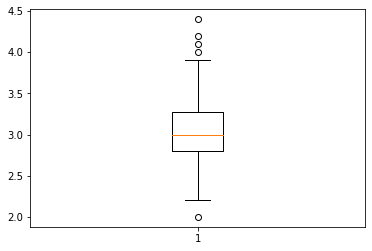

In [19]:
plt.boxplot(df['SW'])
plt.show()

In [20]:
Q1 = np.percentile(df['SW'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['SW'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['SW'], 75, interpolation = 'midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [21]:
df['SW'].median()

3.0

In [22]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [23]:
outlier = []

for x in df['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [24]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [25]:
ind = df['SW']>up_lim
df.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [26]:
ind1 = df['SW']<low_lim
df.loc[ind1].index

Int64Index([60], dtype='int64')

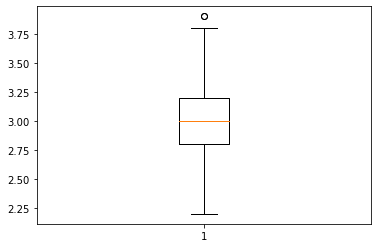

In [27]:
df.drop([14, 15, 32, 33, 60], inplace = True)
plt.boxplot(df['SW'])
plt.show()

In [29]:
df.shape

(145, 5)

In [30]:
df.Classification.nunique()

3

In [31]:
#Normalisation
#dependent variable stored in y
y=df['Classification']
#independent variable stored in x
x=df.drop(['Classification'],axis=1)
x.describe()

SL          SW          PL          PW
count  145.000000  145.000000  145.000000  145.000000
mean     5.870287    3.025489    3.823017    1.226897
std      0.816690    0.374355    1.709115    0.758219
min      4.300000    2.200000    1.000000    0.100000
25%      5.200000    2.800000    1.600000    0.300000
50%      5.855944    3.000000    4.300000    1.300000
75%      6.400000    3.200000    5.100000    1.800000
max      7.900000    3.900000    6.900000    2.500000

In [32]:
from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

0           1           2           3
count  145.000000  145.000000  145.000000  145.000000
mean     0.751763    0.398478    0.462629    0.144279
std      0.047397    0.097399    0.153915    0.078031
min      0.653877    0.238392    0.168646    0.016695
25%      0.714865    0.325894    0.262266    0.051382
50%      0.754573    0.354829    0.536296    0.164742
75%      0.788928    0.507020    0.580073    0.197997
max      0.860963    0.607125    0.636981    0.280419

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
#3.1 Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.44      0.62         9
 Iris-virginica       0.69      1.00      0.81        11

       accuracy                           0.83        29
      macro avg       0.90      0.81      0.81        29
   weighted avg       0.88      0.83      0.81        29



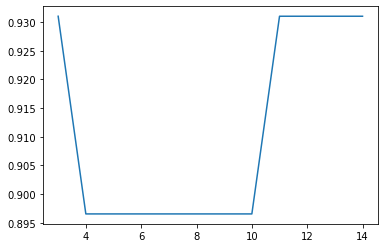

In [35]:
from sklearn.neighbors import KNeighborsClassifier

#to find k value
acc_values=[]
for k in np.arange(3,15):
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_pred,y_test)
    acc_values.append(acc)
plt.plot(np.arange(3,15),acc_values)
plt.show()

In [36]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
#evaluating the performance of the model
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



In [37]:
# Support Vector Machine
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



In [38]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        29
      macro avg       0.95      0.93      0.93        29
   weighted avg       0.94      0.93      0.93        29



In [39]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



In [40]:
# Evaluating feature importance:-
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)

3    0.384043
2    0.294200
1    0.236109
0    0.085648
dtype: float64

In [41]:
# Gradient - Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
GradientBoostingClassifier()
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
print('\nClassification report\n',classification_report(y_test,y_pred))

Confusion matrix
 [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.97        29
   weighted avg       0.97      0.97      0.97        29



In [ ]:
The best accuracy shown are SVM,RANDOM FOREST and GRADIENT BOOSTING.